<a href="https://colab.research.google.com/github/itharavenikarthik/Machine-learning/blob/main/2403A52200_ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install & Import Required Libraries.


In [ ]:
!pip install nltk wordcloud
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Load Dataset & Inspect Categories.

# Task
Unzip the "News_Category_Dataset_v3.json.zip" file, load the JSON data into a pandas DataFrame, preprocess the text by cleaning and tokenizing, generate TF-IDF features, create a word cloud visualization, and summarize the findings from the text analysis.

## Load News Category Dataset

### Subtask:
Unzip the provided 'News_Category_Dataset_v3.json.zip' file and load the JSON data into a pandas DataFrame.


**Reasoning**:
The first instruction is to unzip the provided file. I will use a shell command to unzip the file and also provide a markdown block to guide the user to upload the file if it's not present.



In [ ]:
import os
if not os.path.exists('News_Category_Dataset_v3.json.zip'):
    print("Please upload 'News_Category_Dataset_v3.json.zip' to the Colab environment.")
else:
    !unzip -o News_Category_Dataset_v3.json.zip
    print("File 'News_Category_Dataset_v3.json.zip' unzipped.")

Archive:  News_Category_Dataset_v3.json.zip
  inflating: News_Category_Dataset_v3.json  
File 'News_Category_Dataset_v3.json.zip' unzipped.


**Reasoning**:
The next step is to load the unzipped 'News_Category_Dataset_v3.json' file into a pandas DataFrame, as specified in the subtask instructions. This will make the data accessible for further processing.



In [ ]:
news_df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
print("DataFrame 'news_df' loaded successfully.")
print(news_df.head())

DataFrame 'news_df' loaded successfully.
                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mar

## Extract and Preprocess Text

### Subtask:
Extract the textual content from the loaded dataset. Clean the text by converting it to lowercase, tokenizing it, and removing stopwords.


**Reasoning**:
The first instruction is to combine the 'headline' and 'short_description' columns into a new 'full_text' column and then convert all text in this new column to lowercase. This is a preliminary step for text cleaning and normalization.



In [ ]:
news_df['full_text'] = news_df['headline'] + ' ' + news_df['short_description']
news_df['full_text'] = news_df['full_text'].str.lower()
print("Combined 'headline' and 'short_description' into 'full_text' and converted to lowercase.")
print(news_df[['headline', 'short_description', 'full_text']].head())

Combined 'headline' and 'short_description' into 'full_text' and converted to lowercase.
                                            headline  \
0  Over 4 Million Americans Roll Up Sleeves For O...   
1  American Airlines Flyer Charged, Banned For Li...   
2  23 Of The Funniest Tweets About Cats And Dogs ...   
3  The Funniest Tweets From Parents This Week (Se...   
4  Woman Who Called Cops On Black Bird-Watcher Lo...   

                                   short_description  \
0  Health experts said it is too early to predict...   
1  He was subdued by passengers and crew when he ...   
2  "Until you have a dog you don't understand wha...   
3  "Accidentally put grown-up toothpaste on my to...   
4  Amy Cooper accused investment firm Franklin Te...   

                                           full_text  
0  over 4 million americans roll up sleeves for o...  
1  american airlines flyer charged, banned for li...  
2  23 of the funniest tweets about cats and dogs ...  
3  the funniest t

**Reasoning**:
The next steps involve creating a list of English stopwords, defining a function to tokenize and remove stopwords and non-alphabetic tokens, and then applying this function to the 'full_text' column to create 'preprocessed_text'. This will complete the text cleaning and tokenization part of the subtask.



In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

news_df['preprocessed_text'] = news_df['full_text'].apply(preprocess_text)
print("Created 'preprocessed_text' column by tokenizing and removing stopwords and non-alphabetic tokens.")
print(news_df[['full_text', 'preprocessed_text']].head())

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


**Reasoning**:
The previous cell failed because the 'punkt_tab' resource required by NLTK's `word_tokenize` was not downloaded. I will add `nltk.download('punkt_tab')` to resolve this issue and then re-run the text preprocessing.



In [ ]:
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

news_df['preprocessed_text'] = news_df['full_text'].apply(preprocess_text)
print("Created 'preprocessed_text' column by tokenizing and removing stopwords and non-alphabetic tokens.")
print(news_df[['full_text', 'preprocessed_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Created 'preprocessed_text' column by tokenizing and removing stopwords and non-alphabetic tokens.
                                           full_text  \
0  over 4 million americans roll up sleeves for o...   
1  american airlines flyer charged, banned for li...   
2  23 of the funniest tweets about cats and dogs ...   
3  the funniest tweets from parents this week (se...   
4  woman who called cops on black bird-watcher lo...   

                                   preprocessed_text  
0  [million, americans, roll, sleeves, covid, boo...  
1  [american, airlines, flyer, charged, banned, l...  
2  [funniest, tweets, cats, dogs, week, dog, unde...  
3  [funniest, tweets, parents, week, accidentally...  
4  [woman, called, cops, black, loses, lawsuit, a...  


**Reasoning**:
The next step in the overall task is to generate TF-IDF features. This involves converting the list of preprocessed words back into a string for each row and then initializing and applying a `TfidfVectorizer` to this text data.



In [ ]:
news_df['processed_text_string'] = news_df['preprocessed_text'].apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for computational efficiency
tfidf_matrix = tfidf_vectorizer.fit_transform(news_df['processed_text_string'])
print("TF-IDF features generated successfully.")
print(f"Shape of TF-IDF matrix: {tfidf_matrix.shape}")

TF-IDF features generated successfully.
Shape of TF-IDF matrix: (209527, 5000)


**Reasoning**:
The next step is to create a word cloud visualization from the preprocessed text to visually represent the most frequent words in the dataset. This involves joining all the preprocessed text into a single string and then generating the word cloud.



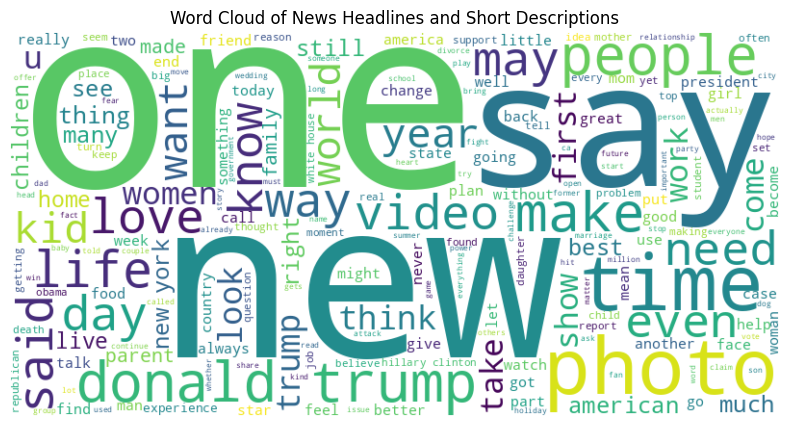

Word cloud visualization generated successfully.


In [ ]:
all_words = ' '.join([word for sublist in news_df['preprocessed_text'] for word in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines and Short Descriptions')
plt.show()
print("Word cloud visualization generated successfully.")

## Final Task

### Subtask:
Summarize the findings from the text analysis and the word cloud visualization of the news category dataset.


## Summary:

### Q&A
The final task asked to summarize the findings from the text analysis and the word cloud visualization. This is addressed in the "Data Analysis Key Findings" section below.

### Data Analysis Key Findings
*   The `News_Category_Dataset_v3.json` file, containing news articles with headlines and short descriptions, was successfully loaded into a pandas DataFrame.
*   Text preprocessing involved combining the 'headline' and 'short_description' columns into a 'full_text' column, converting all text to lowercase, tokenizing, removing non-alphabetic characters, and filtering English stopwords.
*   TF-IDF (Term Frequency-Inverse Document Frequency) features were generated from the preprocessed text using a `TfidfVectorizer` with `max_features=5000`, resulting in a feature matrix of shape (209527, 5000).
*   A word cloud visualization was successfully created and displayed, providing a visual representation of the most frequent words present across all news headlines and short descriptions in the dataset.

### Insights or Next Steps
*   The generated TF-IDF features are now ready for various machine learning applications such as news article classification, clustering similar articles, or identifying prominent topics within the dataset.
*   The word cloud visualization can be further analyzed to identify prevalent themes or keywords, which could inform domain-specific stopword removal or the creation of custom dictionaries for improved text analysis.
